In [2]:
%matplotlib inline
DEFAULT_FIGSIZE = (16, 12)

import os
import pickle
import itertools
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon': True})
import pandas as pd

sys.path.append('..')
from antlia.record import Record, load_file
from antlia.dtype import load_converted_record
from antlia import plot_braking as braking
from antlia import dtc
from antlia.plotdf import plotjoint

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE
mpl.rcParams['legend.facecolor'] = 'white'

colors = sns.color_palette('Paired', 10)

In [69]:
from antlia import exp2
records = exp2.load_records(verbose=True)

creating record from 2018-04-23-12-17-37_0.pkl.gz and 2018-04-23_12-30-38.csv
created record from 2018-04-23-12-17-37_0.pkl.gz and 2018-04-23_12-30-38.csv
creating record from 2018-04-23-13-01-00_0.pkl.gz and 2018-04-23_13-13-36.csv
created record from 2018-04-23-13-01-00_0.pkl.gz and 2018-04-23_13-13-36.csv
creating record from 2018-04-23-14-10-33_0.pkl.gz and 2018-04-23_14-22-58.csv


../antlia/trial2.py:1146: UserWarning: Unable to detect cyclist entry for event starting at t = 476.353 seconds
  msg += 't = {0:.3f} seconds'.format(
../antlia/trial2.py:1146: UserWarning: Unable to detect cyclist entry for event starting at t = 592.204 seconds
  msg += 't = {0:.3f} seconds'.format(
../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or braking for event ending at t = 1288.409 seconds
  msg += '{0:.3f} seconds'.format(
../antlia/trial2.py:1146: UserWarning: Unable to detect cyclist entry for event starting at t = 1435.910 seconds
  msg += 't = {0:.3f} seconds'.format(
../antlia/trial2.py:1146: UserWarning: Unable to detect cyclist entry for event starting at t = 1495.810 seconds
  msg += 't = {0:.3f} seconds'.format(
../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or braking for event ending at t = 1575.710 seconds
  msg += '{0:.3f} seconds'.format(


created record from 2018-04-23-14-10-33_0.pkl.gz and 2018-04-23_14-22-58.csv
creating record from 2018-04-23-15-15-14_0.pkl.gz and 2018-04-23_15-27-48.csv
created record from 2018-04-23-15-15-14_0.pkl.gz and 2018-04-23_15-27-48.csv
creating record from 2018-04-23-16-19-35_0.pkl.gz and 2018-04-23_16-32-27.csv


../antlia/trial2.py:1146: UserWarning: Unable to detect cyclist entry for event starting at t = 296.153 seconds
  msg += 't = {0:.3f} seconds'.format(


created record from 2018-04-23-16-19-35_0.pkl.gz and 2018-04-23_16-32-27.csv
creating record from 2018-04-23-17-01-24_0.pkl.gz and 2018-04-23_17-14-00.csv


../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or braking for event ending at t = 1237.211 seconds
  msg += '{0:.3f} seconds'.format(


created record from 2018-04-23-17-01-24_0.pkl.gz and 2018-04-23_17-14-00.csv
creating record from 2018-04-25-09-15-00_0.pkl.gz and 2018-04-25_09-27-24.csv
created record from 2018-04-25-09-15-00_0.pkl.gz and 2018-04-25_09-27-24.csv
creating record from 2018-04-25-10-07-31_0.pkl.gz and 2018-04-25_10-20-28.csv


../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or braking for event ending at t = 901.060 seconds
  msg += '{0:.3f} seconds'.format(
../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or braking for event ending at t = 1376.516 seconds
  msg += '{0:.3f} seconds'.format(


created record from 2018-04-25-10-07-31_0.pkl.gz and 2018-04-25_10-20-28.csv
creating record from 2018-04-25-11-21-29_0.pkl.gz and 2018-04-25_11-34-04.csv


../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or braking for event ending at t = 1351.011 seconds
  msg += '{0:.3f} seconds'.format(


created record from 2018-04-25-11-21-29_0.pkl.gz and 2018-04-25_11-34-04.csv
creating record from 2018-04-25-12-29-06_0.pkl.gz and 2018-04-25_12-41-48.csv
created record from 2018-04-25-12-29-06_0.pkl.gz and 2018-04-25_12-41-48.csv
creating record from 2018-04-25-14-02-15_0.pkl.gz and 2018-04-25_14-14-57.csv


../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or braking for event ending at t = 106.702 seconds
  msg += '{0:.3f} seconds'.format(


created record from 2018-04-25-14-02-15_0.pkl.gz and 2018-04-25_14-14-57.csv
creating record from 2018-04-25-14-36-55_0.pkl.gz and 2018-04-25_14-49-39.csv
created record from 2018-04-25-14-36-55_0.pkl.gz and 2018-04-25_14-49-39.csv
creating record from 2018-04-25-16-03-24_0.pkl.gz and 2018-04-25_16-15-57.csv
created record from 2018-04-25-16-03-24_0.pkl.gz and 2018-04-25_16-15-57.csv
creating record from 2018-04-25-17-10-07_0.pkl.gz and 2018-04-25_17-23-04.csv
created record from 2018-04-25-17-10-07_0.pkl.gz and 2018-04-25_17-23-04.csv
creating record from 2018-04-26-11-07-38_0.pkl.gz and 2018-04-26_11-19-31.csv


../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or braking for event ending at t = 472.355 seconds
  msg += '{0:.3f} seconds'.format(


created record from 2018-04-26-11-07-38_0.pkl.gz and 2018-04-26_11-19-31.csv
creating record from 2018-04-26-14-38-03_0.pkl.gz and 2018-04-26_14-50-53.csv
created record from 2018-04-26-14-38-03_0.pkl.gz and 2018-04-26_14-50-53.csv
creating record from 2018-04-27-14-47-07_0.pkl.gz and 2018-04-27_14-59-52.csv


../antlia/trial2.py:1146: UserWarning: Unable to detect cyclist entry for event starting at t = 298.803 seconds
  msg += 't = {0:.3f} seconds'.format(
../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or braking for event ending at t = 304.652 seconds
  msg += '{0:.3f} seconds'.format(
../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or braking for event ending at t = 701.207 seconds
  msg += '{0:.3f} seconds'.format(
../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or braking for event ending at t = 779.907 seconds
  msg += '{0:.3f} seconds'.format(
../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or braking for event ending at t = 845.308 seconds
  msg += '{0:.3f} seconds'.format(
../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or braking for event ending at t = 1252.612 seconds
  msg += '{0:.3f} seconds'.format(
../antlia/trial2.py:1154: UserWarning: Unable to detect cyclist exit or b

created record from 2018-04-27-14-47-07_0.pkl.gz and 2018-04-27_14-59-52.csv


In [70]:
# verify correct braking and overtaking detection
for i, r in enumerate(records):
    for j, t in enumerate(r.trials):
        if t.event.type != exp2.instructed_eventtype(i, j):
            print('{}-{} incorrect event type, expected {} got {}'.format(
                i, j, exp2.instructed_eventtype(i, j), t.event.type))

In [ ]:
from antlia import plot_braking as braking
from antlia import trial2

DEFAULT_FIGSIZE = (16, 12)
mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE
%matplotlib inline 
    
def plot_trials(r):
    axes = []
    for trial in r.trials:
        if trial.event.type.value != trial2.EventType.Braking.value:
            continue
        
        metrics_kw = {'braking_threshold': 0.1, 'min_size': 75}
            
        fig, ax = braking.plot_trial_braking_event(
            trial.event.bicycle, metrics_kw=metrics_kw, figsize=DEFAULT_FIGSIZE)
        axes.append(ax)
    return axes

plt.close('all')

colors = sns.color_palette('Paired', 12)

for i, r in enumerate(records):
    axes = plot_trials(r)
    for j, ax in enumerate(axes):
        ax.set_title('rider {}, trial {}'.format(i, j))
    plt.show()
plt.show()

In [ ]:
metrics_kw = {'braking_threshold': 0.1, 'min_size': 75}

def get_metrics(records):
    """Define function to get metrics for lidar data.
    """
    metrics = []
    for i, r in enumerate(records):
        for j, tr in enumerate(r.trials):
            if tr.event.type.value  != EventType.Braking.value:
                continue
            m = braking.get_metrics(tr.event.data, **metrics_kw)[0]
            m['rider id'] = i
            m['trial id'] = j
            metrics.append(m)
    
    return np.concatenate(metrics)

metrics = get_metrics(records)

In [ ]:
plt.close('all')
braking.plot_histograms(metrics, figsize=DEFAULT_FIGSIZE)
plt.show()

In [ ]:
plt.close('all')
braking.plot_swarms(metrics, figsize=(16, 20))
plt.show()

In [ ]:
plt.close('all')
braking.plot_bivariates(metrics, show_hull=True)
plt.show()

In [ ]:
# missing rider 5, trial 16 - should be braking
# but apparently i wasn't paying attention during
# data collection
df = braking.get_dataframe(metrics)
df

In [ ]:
# convert to pandas dataframe
df = braking.get_dataframe(metrics)

dtc = []
print('calculating dtc')
plt.close('all')
cols = ['rider id', 'trial id', 'braking starttime', 'starting velocity']
for _, i, j, t0, v in df[cols].itertuples():
    tr = records[i].trials[j]
    evt = records[i].trials[j].event
    try:
        dtc.append(evt.calculate_dtc(t0))
    except Exception as e:
        print('failure for {}-{}'.format(i, j))
        #raise e
    else:
        k = evt.lidar.frame_index(t0)
        fig, ax = evt._plot_closest_pair(k, figsize=(16, 8))
        ax.set_title('rider {} trial {}, v: {:0.3f}, dtc: {:0.3f}'.format(
            i, j, v, dtc[-1]))
        plt.show()
    
# add distance/time-to-collision to dataframe
df['distance-to-collision'] = dtc

f = lambda row: row['distance-to-collision']/row['starting velocity']
df['time-to-collision'] = df.apply(f, axis=1)
    
df

In [ ]:
plt.close('all')

fig, ax = plt.subplots(figsize=(16, 12))
sns.swarmplot(x='rider id', y='distance-to-collision', data=df, ax=ax)
ax.set_title('rider vs DTC')

fig, ax = plt.subplots(figsize=(16, 12))
sns.swarmplot(x='rider id', y='time-to-collision', data=df, ax=ax)
ax.set_title('rider vs TTC')

plt.show()

In [ ]:
from antlia.plotdf import plotjoint

colors = sns.color_palette('tab10', 10)

plt.close('all')
g = plotjoint('starting velocity', 'distance-to-collision', df,
              kde_key=('rider id', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'distance-to-collision [m]')

g = plotjoint('starting velocity', 'time-to-collision', df,
              kde_key=('rider id', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'time-to-collision [s]')
plt.show()

In [8]:
df.to_pickle('trial2_braking_ttc.p.gz')

dtc: 13.554729597425254


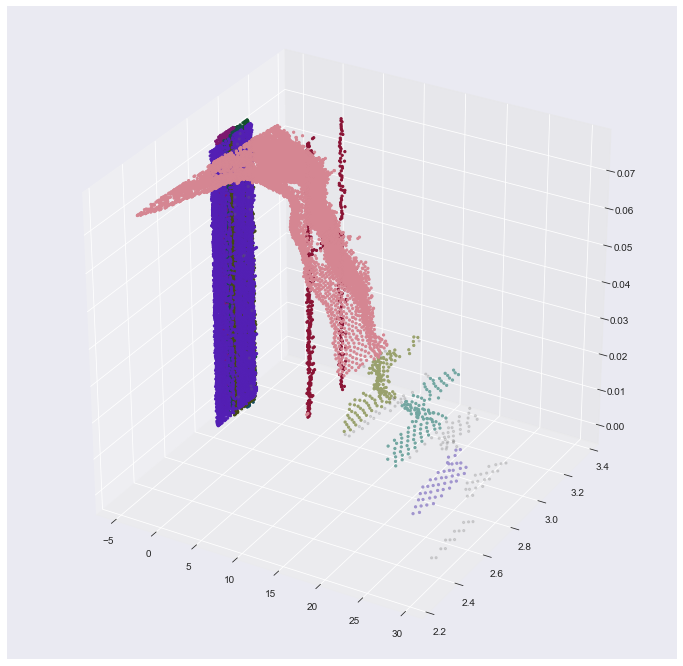

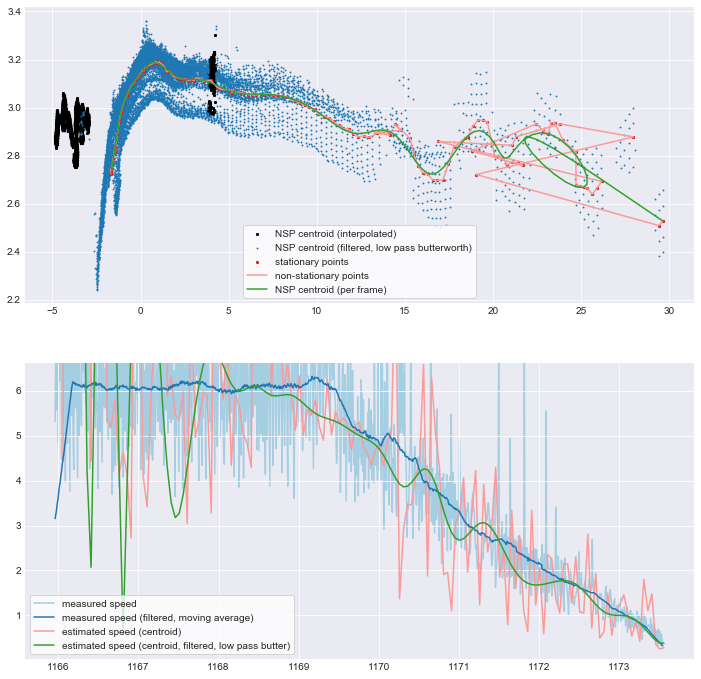

generating plots for index [61]
generating plots for index [62]


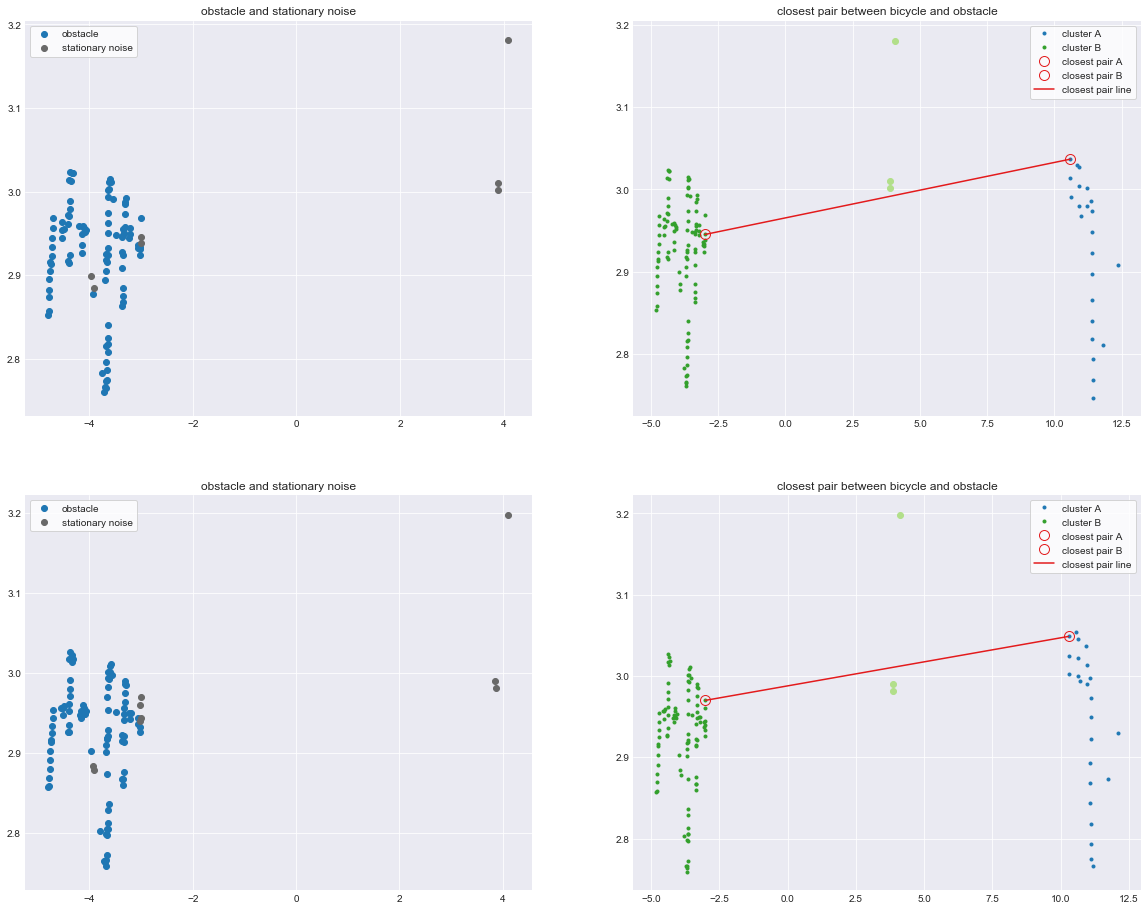

In [398]:
"""
5-9:	0.151
5-10:	5.914
failure for 5-11
failure for 5-15
"""
#evt_id = (2, 1)
evt_id = (5, 15)
evt = records[evt_id[0]].trials[evt_id[1]].event

#hdbscan_kw = {
#    'min_cluster_size': 30,
#    'min_samples': 30,
#    'metric': 'euclidean',
#    'allow_single_cluster': False,
#}
hdbscan_kw = None
evt._identify_stationary(hdbscan_kw=hdbscan_kw)

t0 = df[(df['rider id'] == evt_id[0]) &
        (df['trial id'] == evt_id[1])]['braking starttime'].values[0]
try:
    d = evt.calculate_dtc(t0)
except (ValueError, TypeError) as e:
    print('dtc calculation failed')
    print(e)
    #raise(e)
else:
    print('dtc:', d)

plt.close('all')

fig, ax = evt.plot_clusters(figsize=(12, 12))
fig, ax = evt.plot_trajectory(figsize=(12, 12))
plt.show()

i = evt.lidar.frame_index(t0)
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(20, 16))
for j, ax in zip([i - 1, i], axes):
    print('generating plots for index {}'.format(j))
    
    #hdbscan_kw = {
    #    'min_cluster_size': 15,
    #    'min_samples': 10,
    #    'metric': 'euclidean',
    #    'allow_single_cluster': True,
    #}
    hdbscan_kw = None
    evt._plot_stationary_clusters(j, hdbscan_kw=hdbscan_kw, ax=ax[0])
    ax[0].set_title('obstacle and stationary noise')
    
    try:
        evt._plot_closest_pair(j, ax=ax[1])
    except Exception as e:
        #pass
        raise(e)
    else:
        ax[1].set_title('closest pair between bicycle and obstacle')
    
plt.show()

number of clusters 17
label 0 	zmean 0.016	zspan 13 	count 114 	area 1.942 	False
label 1 	zmean 0.023	zspan 16 	count 155 	area 1.715 	False
label 2 	zmean 0.040	zspan 152 	count 628 	area 0.135 	True
label 3 	zmean 0.037	zspan 148 	count 1182 	area 0.024 	True
label 4 	zmean 0.038	zspan 152 	count 1866 	area 0.026 	True
label 5 	zmean 0.038	zspan 152 	count 4712 	area 0.091 	True
label 6 	zmean 0.037	zspan 150 	count 436 	area 0.003 	True
label 7 	zmean 0.038	zspan 152 	count 2407 	area 0.019 	True
label 8 	zmean 0.038	zspan 152 	count 598 	area 0.005 	True
label 9 	zmean 0.034	zspan 114 	count 114 	area 0.001 	True
label 10 	zmean 0.037	zspan 149 	count 403 	area 0.002 	True
label 11 	zmean 0.038	zspan 152 	count 1357 	area 0.011 	True
label 12 	zmean 0.038	zspan 152 	count 961 	area 0.011 	True
label 13 	zmean 0.039	zspan 133 	count 246 	area 0.005 	True
label 14 	zmean 0.032	zspan 60 	count 60 	area 0.000 	True
label -1 	zmean 0.032	zspan 143 	count 739 	area 23.342 	False
label 1

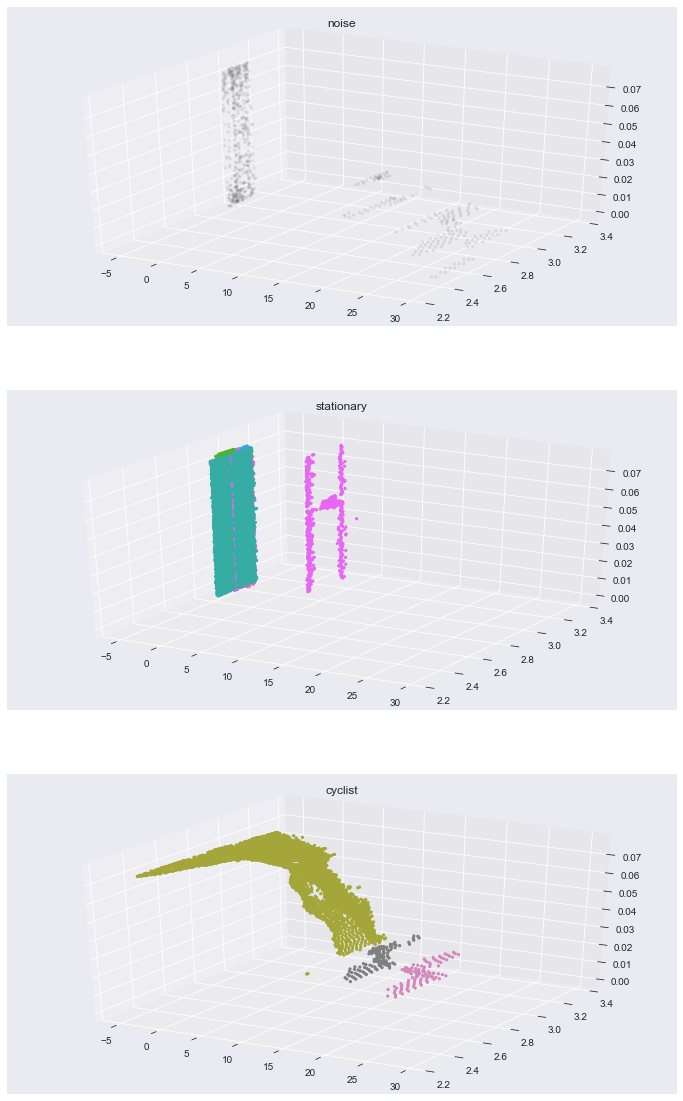

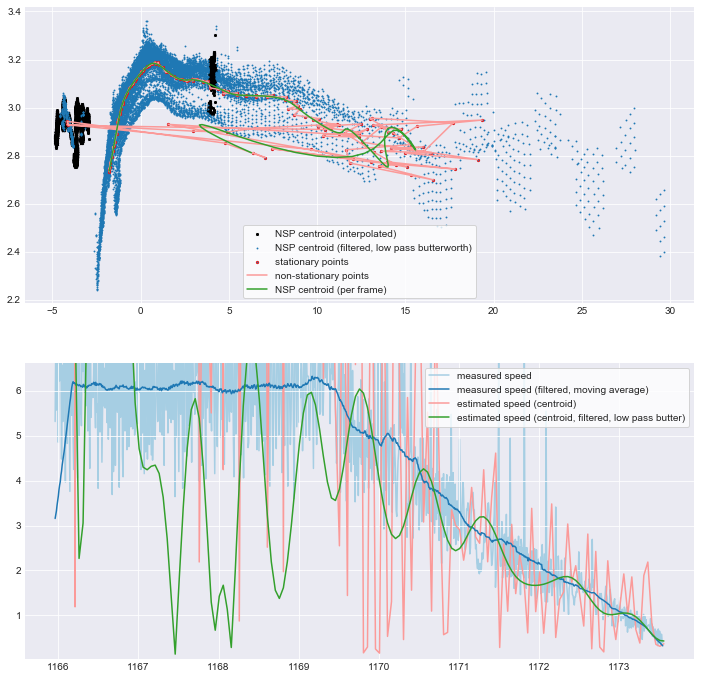

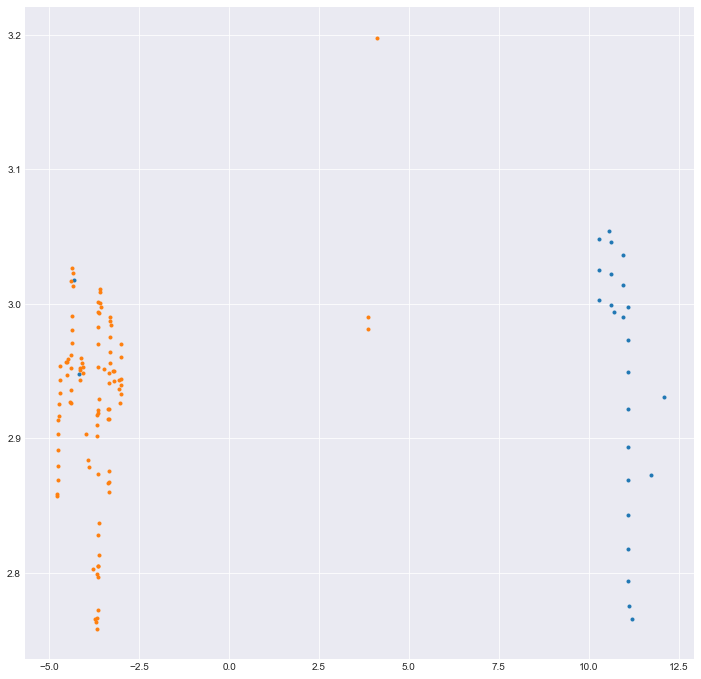

In [397]:
from antlia.trial2 import VALID_BB

evt_id = (5, 15)
evt = records[evt_id[0]].trials[evt_id[1]].event

#hdbscan_kw = {
#    #'min_cluster_size': 60,
#    #'min_samples': 40,
#    'min_cluster_size': 15,
#    'min_samples': 10,
#    'metric': 'euclidean',
#    'allow_single_cluster': False,
#}
hdbscan_kw = None
evt._identify_stationary(hdbscan_kw=hdbscan_kw)

print('number of clusters', len(evt.clusters))
for cluster in evt.clusters:
    print('label {} \tzmean {:0.3f}\tzspan {} \tcount {} \tarea {:0.3f} \t{}'.format(
        cluster.label, cluster.zmean, cluster.zspan, cluster.count, cluster.area, cluster.stationary
    ))

stationary_colors = np.roll(sns.husl_palette(6), -1, axis=0)[1:]
colors = sns.color_palette('tab10', 10, desat=0.7)
s = itertools.cycle(stationary_colors)
c = itertools.cycle(colors)

stationary = True

def g(i):
    def f(cluster):
        kw = {}
        if cluster.label == -1:
            kw['color'] = 'dimgray'
            kw['alpha'] = 0.1 if i == 0 else 0
        else:
            if cluster.stationary:
                kw['color'] = next(s)
                kw['alpha'] = 1 if i == 1 else 0
            else:
                kw['color'] = next(c)
                kw['alpha'] = 1 if i == 2 else 0
        return kw
    return f

plt.close('all')

fig, axes = plt.subplots(3, 1, subplot_kw={'projection': '3d'}, figsize=(12, 20))
evt.plot_clusters(plot_cluster_func=g(0), ax=axes[0])
evt.plot_clusters(plot_cluster_func=g(1), ax=axes[1])
evt.plot_clusters(plot_cluster_func=g(2), ax=axes[2])
axes[0].set_title('noise')
axes[1].set_title('stationary')
axes[2].set_title('cyclist')
fig, ax = evt.plot_trajectory(figsize=(12, 12))

colors = sns.color_palette('tab10', 10)
fig, ax = plt.subplots(figsize=(12, 12))

t0 = df[(df['rider id'] == evt_id[0]) &
        (df['trial id'] == evt_id[1])]['braking starttime'].values[0]
i = evt.lidar.frame_index(t0)[0]

X = evt._compressed_points(i, False)
Y = evt._compressed_points(i, True)

ax.scatter(*X.T, marker='.', color=colors[0])
ax.scatter(*Y.T, marker='.', color=colors[1])

plt.show()